# Section 2: Model Training and Evaluation

## Airbnb Dataset - XGBoost Regression Model

This notebook trains and evaluates XGBoost regression model on the Airbnb Dataset.

**Model Evaluated:**
- **XGBoost**: Gradient boosting with tree-based learners for regression
- **Enhanced XGBoost**: With advanced preprocessing, feature engineering, and hyperparameter tuning

**Evaluation Components:**
- Comprehensive regression performance metrics
- Actual vs Predicted plots
- Residual analysis
- Feature importance analysis
- Cross-validation evaluation
- Computational efficiency analysis
- Model comparison between original and enhanced versions

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import os
warnings.filterwarnings('ignore')

# Import our XGBoost training functions
from xgboost_training_functions import (
    setup_logging,
    load_preprocessed_data,
    initialize_evaluator,
    train_xgboost_model,
    analyze_feature_importance,
    analyze_model_performance,
    perform_cross_validation,
    analyze_predictions_by_range,
    perform_error_analysis,
    generate_business_insights,
    save_results,
    print_final_summary
)
from xgboost_enhanced_training import XGBoostEnhancedTrainer

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Section 2: XGBoost Model Training and Evaluation")
print("Dataset: Airbnb Dataset")
print("Task: Regression - Predicting Airbnb listing prices")

🚀 Section 2: XGBoost Model Training and Evaluation
Dataset: Airbnb Dataset
Task: Regression - Predicting Airbnb listing prices


## 2.1 Setup Logging and Load Data

In [5]:
# Setup logging - all print statements will be logged to Section2_Model_Training.log
logger = setup_logging('Section2_Model_Training.log')

# Load preprocessed data from Section 1
data = load_preprocessed_data(logger)

print("✅ Data loaded and logging setup completed!")

2025-07-31 08:44:13,284 - INFO - 🚀 Section 2: XGBoost Model Training and Evaluation
2025-07-31 08:44:13,285 - INFO - Dataset: Airbnb Dataset
2025-07-31 08:44:13,286 - INFO - Task: Regression - Predicting Airbnb listing prices
2025-07-31 08:44:13,290 - INFO - ✅ Preprocessed data loaded successfully!
2025-07-31 08:44:13,290 - INFO - Training set: (31285, 13)
2025-07-31 08:44:13,291 - INFO - Validation set: (7822, 13)
2025-07-31 08:44:13,292 - INFO - Test set: (9777, 13)
2025-07-31 08:44:13,292 - INFO - Features: 13
2025-07-31 08:44:13,293 - INFO - Task: Regression
2025-07-31 08:44:13,294 - INFO - Target range: [10, 10000]


✅ Data loaded and logging setup completed!


## 2.2 Initialize Evaluator

In [3]:
# Initialize comprehensive evaluator
evaluator, models = initialize_evaluator(data, logger)

print("✅ Evaluator initialized successfully!")

2025-07-28 13:34:57,576 - INFO - 🔧 Evaluator initialized
2025-07-28 13:34:57,577 - INFO - Ready to train XGBoost model on 13 features
2025-07-28 13:34:57,578 - INFO - Training samples: 31,285
2025-07-28 13:34:57,578 - INFO - Test samples: 9,777
2025-07-28 13:34:57,579 - INFO - Task: Regression (Airbnb Price Prediction)
2025-07-28 13:34:57,579 - INFO - 
Target distribution:
2025-07-28 13:34:57,581 - INFO - Training:   Mean=$153.34, Std=$258.18, Range=[$10.00, $10000.00]
2025-07-28 13:34:57,582 - INFO - Validation: Mean=$152.52, Std=$209.34, Range=[$10.00, $7703.00]
2025-07-28 13:34:57,583 - INFO - Test:       Mean=$151.06, Std=$200.09, Range=[$10.00, $8000.00]


✅ Evaluator initialized successfully!


## 2.3 Train Original XGBoost Model

2025-07-28 13:34:59,248 - INFO - 🌳 Training XGBoost for Regression...
2025-07-28 13:34:59,250 - INFO - 
📊 Target Analysis for Parameter Optimization:
2025-07-28 13:34:59,250 - INFO -    Price Range: $10.00 - $10000.00
2025-07-28 13:34:59,251 - INFO -    Price Std: $258.18
2025-07-28 13:34:59,253 - INFO -    Price Skewness: 19.989



Evaluating XGBoost

📊 Airbnb Price Prediction Performance Metrics:
   R² Score: 0.1839
   RMSE: $180.75
   MAE: $68.90
   MSE: $32671.78
   MAPE: 0.50%
   Explained Variance: 0.1845
   Max Error: $5123.19
   Median Absolute Error: $32.15

⏱️  Timing:
   Training Time: 1.3936s
   Inference Time: 0.0309s
   Predictions/sec: 316872

🔄 Cross-Validation:
   R² Score: 0.1133 ± 0.0194


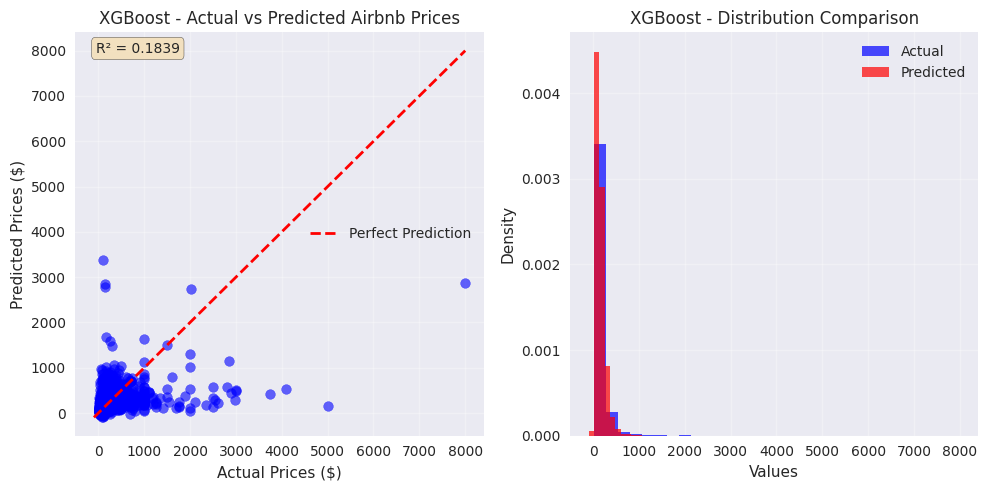

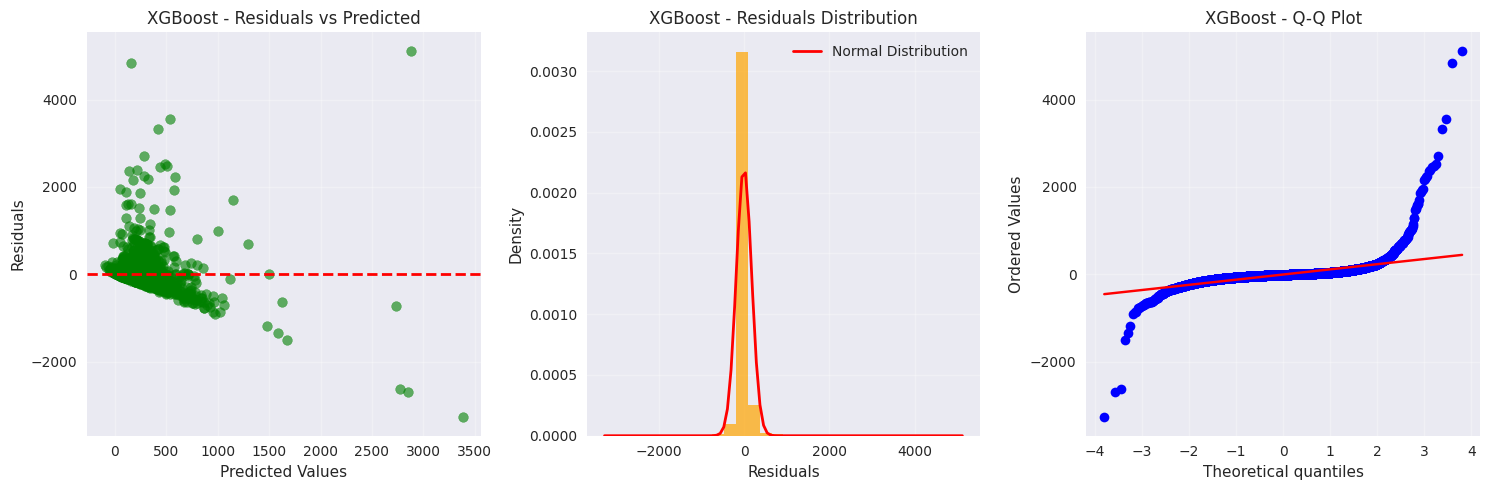

2025-07-28 13:35:09,206 - INFO - ✅ XGBoost training completed
2025-07-28 13:35:09,207 - INFO - 
📊 XGBoost Results:
2025-07-28 13:35:09,208 - INFO -    R² Score: 0.1839
2025-07-28 13:35:09,208 - INFO -    RMSE: $180.75
2025-07-28 13:35:09,209 - INFO -    MAE: $68.90
2025-07-28 13:35:09,209 - INFO -    MAPE: 0.50%
2025-07-28 13:35:09,210 - INFO -    Explained Variance: 0.1845
2025-07-28 13:35:09,211 - INFO -    Training Time: 1.39s
2025-07-28 13:35:09,211 - INFO - 
🎯 Airbnb Pricing Context:
2025-07-28 13:35:09,212 - INFO -    ⚠️ Low R² is common for Airbnb pricing due to:
2025-07-28 13:35:09,213 - INFO -       • High price variability across listings
2025-07-28 13:35:09,213 - INFO -       • Host subjective pricing strategies
2025-07-28 13:35:09,214 - INFO -       • Missing features (amenities, photos, reviews quality)
2025-07-28 13:35:09,214 - INFO -       • Seasonal and event-based demand fluctuations
2025-07-28 13:35:09,215 - INFO - 
💡 Practical Interpretation:
2025-07-28 13:35:09,216 

✅ Original XGBoost model trained successfully!


In [4]:
# Train XGBoost regression model
xgb_model, xgb_results = train_xgboost_model(data, evaluator, logger)
models['XGBoost'] = xgb_model

print("✅ Original XGBoost model trained successfully!")

## 2.4 Feature Importance Analysis

2025-07-28 13:35:09,722 - INFO - 
🔍 Feature Importance Analysis
2025-07-28 13:35:09,724 - INFO - ==================================================
2025-07-28 13:35:09,728 - INFO - Top 10 Most Important Features:
2025-07-28 13:35:09,730 - INFO -                        feature  importance
                     room_type    0.135141
                minimum_nights    0.105163
                      latitude    0.082796
                   last_review    0.082575
                 neighbourhood    0.078579
calculated_host_listings_count    0.078066
                     longitude    0.075535
                     host_name    0.073114
              availability_365    0.072910
                          name    0.071003


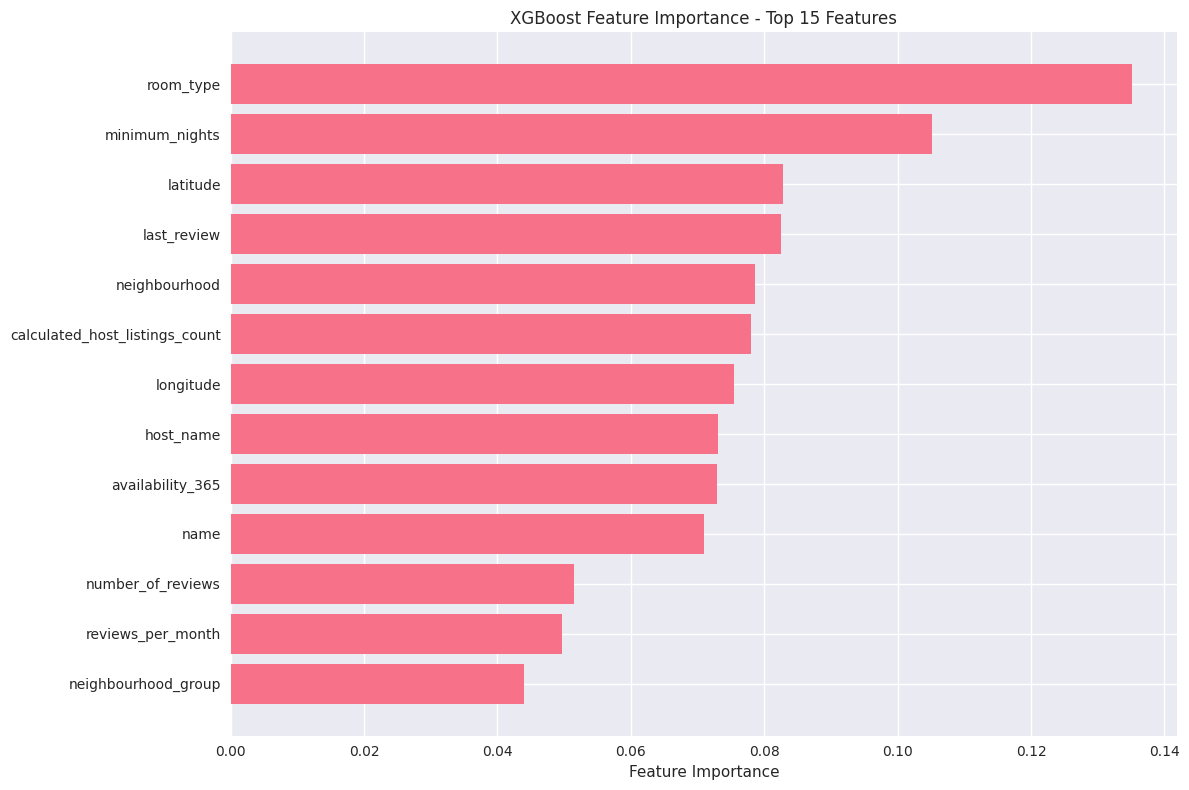

✅ Feature importance analysis completed!


In [5]:
# Analyze and plot feature importance
feature_importance_df = analyze_feature_importance(xgb_model, data['feature_names'], logger)

print("✅ Feature importance analysis completed!")

## 2.5 Model Performance Analysis

In [6]:
# Analyze model performance in detail
y_pred, performance_metrics = analyze_model_performance(xgb_model, data, logger)

print("✅ Model performance analysis completed!")

2025-07-28 13:35:12,093 - INFO - 
📈 Model Performance Analysis
2025-07-28 13:35:12,094 - INFO - ==================================================
2025-07-28 13:35:12,128 - INFO - Detailed Performance Metrics:
2025-07-28 13:35:12,129 - INFO -   Mean Squared Error (MSE): 32671.7792
2025-07-28 13:35:12,130 - INFO -   Root Mean Squared Error (RMSE): 180.7534
2025-07-28 13:35:12,131 - INFO -   Mean Absolute Error (MAE): 68.8999
2025-07-28 13:35:12,132 - INFO -   R² Score: 0.1839
2025-07-28 13:35:12,132 - INFO -   Mean Absolute Percentage Error (MAPE): 0.4955%
2025-07-28 13:35:12,134 - INFO -   Explained Variance Score: 0.1845
2025-07-28 13:35:12,135 - INFO - 
🎯 Performance Interpretation:
2025-07-28 13:35:12,135 - INFO -    ❌ Poor performance (R² = 0.1839)
2025-07-28 13:35:12,136 - INFO -    Average prediction error: ±$68.90
2025-07-28 13:35:12,137 - INFO -    Percentage error: 0.5%


✅ Model performance analysis completed!


## 2.6 Cross-Validation Analysis

In [7]:
# Perform k-fold cross-validation
cv_scores = perform_cross_validation(xgb_model, data, logger)

print("✅ Cross-validation analysis completed!")

2025-07-28 13:35:13,551 - INFO - 
🔄 Cross-Validation Analysis
2025-07-28 13:35:13,552 - INFO - ==================================================
2025-07-28 13:35:18,865 - INFO - 5-Fold Cross-Validation Results:
2025-07-28 13:35:18,868 - INFO -   R² Scores: [0.17346464 0.07097813 0.11999044 0.09664813 0.09796781]
2025-07-28 13:35:18,869 - INFO -   Mean R² Score: 0.1118
2025-07-28 13:35:18,870 - INFO -   Standard Deviation: 0.0345
2025-07-28 13:35:18,871 - INFO -   95% Confidence Interval: [0.0442, 0.1795]


✅ Cross-validation analysis completed!


## 2.7 Prediction Analysis by Range

In [8]:
# Analyze prediction accuracy across different target value ranges
analyze_predictions_by_range(data['y_test'], y_pred, logger)

print("✅ Prediction range analysis completed!")

2025-07-28 13:35:20,122 - INFO - 
🎯 Prediction Analysis
2025-07-28 13:35:20,123 - INFO - ==================================================
2025-07-28 13:35:20,125 - INFO - Performance by Target Value Range:
2025-07-28 13:35:20,125 - INFO - ------------------------------------------------------------
2025-07-28 13:35:20,128 - INFO - Low (0-25%)          | Samples: 2509 | R²: -22.103 | MAE: 29.8 | MAPE: 0.7%
2025-07-28 13:35:20,130 - INFO - Medium-Low (25-50%)  | Samples: 2450 | R²: -81.049 | MAE: 44.9 | MAPE: 0.5%
2025-07-28 13:35:20,132 - INFO - Medium-High (50-75%) | Samples: 2455 | R²: -37.350 | MAE: 60.1 | MAPE: 0.4%
2025-07-28 13:35:20,134 - INFO - High (75-100%)       | Samples: 2445 | R²: 0.095 | MAE: 140.6 | MAPE: 0.4%


✅ Prediction range analysis completed!


## 2.8 Error Analysis

In [9]:
# Perform detailed error analysis
residuals, abs_residuals = perform_error_analysis(data['y_test'], y_pred, logger)

print("✅ Error analysis completed!")

2025-07-28 13:35:21,970 - INFO - 
🔍 Error Analysis
2025-07-28 13:35:21,971 - INFO - ==================================================
2025-07-28 13:35:21,972 - INFO - Top 10 Worst Predictions:
2025-07-28 13:35:21,973 - INFO - Actual | Predicted | Error | Abs Error
2025-07-28 13:35:21,973 - INFO - ----------------------------------------
2025-07-28 13:35:21,974 - INFO -   8000 |      2877 |  5123 |      5123
2025-07-28 13:35:21,975 - INFO -   5000 |       154 |  4846 |      4846
2025-07-28 13:35:21,975 - INFO -   4100 |       541 |  3559 |      3559
2025-07-28 13:35:21,976 - INFO -   3750 |       420 |  3330 |      3330
2025-07-28 13:35:21,976 - INFO -    103 |      3381 | -3278 |      3278
2025-07-28 13:35:21,977 - INFO -   2990 |       285 |  2705 |      2705
2025-07-28 13:35:21,978 - INFO -    150 |      2852 | -2702 |      2702
2025-07-28 13:35:21,978 - INFO -    150 |      2776 | -2626 |      2626
2025-07-28 13:35:21,979 - INFO -   3000 |       484 |  2516 |      2516
2025-07-28 1

✅ Error analysis completed!


## 2.9 Business Insights

In [10]:
# Generate business insights for Airbnb pricing
generate_business_insights(feature_importance_df, data['feature_names'], logger)

print("✅ Business insights generated!")

2025-07-28 13:35:27,192 - INFO - 
💼 Business Insights for Airbnb Pricing
2025-07-28 13:35:27,194 - INFO - ==================================================
2025-07-28 13:35:27,195 - INFO - Top 5 Most Important Features for Airbnb Price Prediction:
2025-07-28 13:35:27,195 - INFO -   1. room_type: 0.135
2025-07-28 13:35:27,196 - INFO -   2. minimum_nights: 0.105
2025-07-28 13:35:27,197 - INFO -   3. latitude: 0.083
2025-07-28 13:35:27,198 - INFO -   4. last_review: 0.083
2025-07-28 13:35:27,198 - INFO -   5. neighbourhood: 0.079
2025-07-28 13:35:27,200 - INFO - 
🗺️ Neighbourhood Group is less important for price prediction
2025-07-28 13:35:27,200 - INFO - 
🗺️ Neighbourhood is moderately important for price prediction
2025-07-28 13:35:27,201 - INFO - 
🗺️ Latitude is moderately important for price prediction
2025-07-28 13:35:27,201 - INFO - 
🗺️ Longitude is moderately important for price prediction
2025-07-28 13:35:27,202 - INFO - 🏠 Room Type is very important for price prediction
2025-07

✅ Business insights generated!


## 2.10 Save Original Model Results

In [11]:
# Save all results and models
save_results(xgb_model, xgb_results, feature_importance_df, data['y_test'], y_pred, residuals, abs_residuals, logger)

print("✅ Original model results saved successfully!")

2025-07-28 13:35:36,276 - INFO - 
💾 Saving Results
2025-07-28 13:35:36,277 - INFO - ==================================================
2025-07-28 13:35:36,281 - INFO - ✅ Model results saved to './Section2_Model_Training/xgboost_evaluation_results.csv'
2025-07-28 13:35:36,282 - INFO - ✅ Feature importance saved to './Section2_Model_Training/xgboost_feature_importance.csv'
2025-07-28 13:35:36,325 - INFO - ✅ Predictions saved to './Section2_Model_Training/xgboost_predictions.csv'
2025-07-28 13:35:36,343 - INFO - ✅ Model saved to './Section2_Model_Training/xgboost_model.pkl'


✅ Original model results saved successfully!


## 2.11 Enhanced XGBoost Training with Advanced Preprocessing

Now we'll train an enhanced version of XGBoost with:
- XGBoost-specific data cleaning and preprocessing
- Advanced feature engineering
- Hyperparameter tuning
- Outlier detection and handling
- Target transformation

In [12]:
print("\n" + "="*80)
print("ENHANCED XGBOOST TRAINING WITH ADVANCED PREPROCESSING")
print("="*80)
print("🚀 Starting Enhanced XGBoost Training Pipeline...")
print("This includes XGBoost-specific preprocessing, feature engineering, and hyperparameter tuning")

try:
    # Initialize enhanced trainer
    enhanced_trainer = XGBoostEnhancedTrainer(random_state=42)
    
    # Run complete enhanced training pipeline
    enhanced_results = enhanced_trainer.run_complete_enhanced_training()
    
    print("\n✅ Enhanced XGBoost training completed successfully!")
    
    # Store enhanced results for comparison
    baseline_enhanced_metrics = enhanced_results['baseline_metrics']
    tuned_enhanced_metrics = enhanced_results['tuned_metrics']
    
except Exception as e:
    print(f"❌ Enhanced training failed: {str(e)}")
    print("Continuing with original XGBoost results only...")
    print("Check that all required dependencies are installed and preprocessing data is available.")
    baseline_enhanced_metrics = None
    tuned_enhanced_metrics = None

2025-07-28 13:35:38,458 - INFO - 🚀 Enhanced XGBoost Training with Advanced Preprocessing
2025-07-28 13:35:38,459 - INFO - Dataset: Airbnb Dataset
2025-07-28 13:35:38,460 - INFO - Task: Regression - Predicting Airbnb listing prices
2025-07-28 13:35:38,462 - INFO - ✅ Base preprocessed data loaded successfully!
2025-07-28 13:35:38,462 - INFO - 
🔧 XGBoost-Specific Data Preprocessing
2025-07-28 13:35:38,463 - INFO - ============================================================
2025-07-28 13:35:38,464 - INFO - 1. Outlier Detection and Handling



ENHANCED XGBOOST TRAINING WITH ADVANCED PREPROCESSING
🚀 Starting Enhanced XGBoost Training Pipeline...
This includes XGBoost-specific preprocessing, feature engineering, and hyperparameter tuning


2025-07-28 13:35:39,048 - INFO -    • Removed 2263 outliers (7.2%)
2025-07-28 13:35:39,049 - INFO - 2. Target Variable Transformation
2025-07-28 13:35:39,051 - INFO -    • Original target skewness: 1.426
2025-07-28 13:35:39,155 - INFO -    • Applied boxcox transformation
2025-07-28 13:35:39,156 - INFO -    • New target skewness: 0.004
2025-07-28 13:35:39,157 - INFO - 3. Advanced Feature Scaling (Robust Scaler)
2025-07-28 13:35:39,181 - INFO -    • Applied RobustScaler (median-based scaling)
2025-07-28 13:35:39,182 - INFO - 4. Feature Engineering
2025-07-28 13:35:39,183 - INFO -    • Creating polynomial features for top 5 features
2025-07-28 13:35:39,196 - INFO -    • Creating statistical features
2025-07-28 13:35:39,214 - INFO -    • Creating binned features
2025-07-28 13:35:39,258 - INFO -    • Created 30 new features
2025-07-28 13:35:39,259 - INFO - 5. Feature Selection
2025-07-28 13:35:46,986 - INFO -    • Selected 43 features using mutual information
2025-07-28 13:35:46,987 - INFO 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


2025-07-28 13:50:41,495 - INFO -    • Best CV R² Score: 0.6530
2025-07-28 13:50:41,496 - INFO -    • Tuning Time: 893.76s
2025-07-28 13:50:41,497 - INFO -    • Best Parameters:
2025-07-28 13:50:41,498 - INFO -      - subsample: 0.7
2025-07-28 13:50:41,498 - INFO -      - reg_lambda: 1.5
2025-07-28 13:50:41,499 - INFO -      - reg_alpha: 0.1
2025-07-28 13:50:41,499 - INFO -      - n_estimators: 1000
2025-07-28 13:50:41,500 - INFO -      - min_child_weight: 1
2025-07-28 13:50:41,501 - INFO -      - max_depth: 8
2025-07-28 13:50:41,501 - INFO -      - learning_rate: 0.01
2025-07-28 13:50:41,502 - INFO -      - gamma: 0.1
2025-07-28 13:50:41,502 - INFO -      - colsample_bytree: 0.7
2025-07-28 13:50:41,502 - INFO - 2. Fine-tuning around best parameters


Fitting 3 folds for each of 19683 candidates, totalling 59049 fits


KeyboardInterrupt: 

## 2.12 Comprehensive Model Comparison

In [ ]:
if baseline_enhanced_metrics and tuned_enhanced_metrics:
    print("\n" + "="*80)
    print("COMPREHENSIVE MODEL COMPARISON")
    print("="*80)
    
    # Compare Original vs Enhanced models
    print(f"\n📊 R² Score Comparison:")
    print(f"   Original XGBoost:     {performance_metrics['r2']:.4f}")
    print(f"   Enhanced Baseline:    {baseline_enhanced_metrics['r2_score']:.4f}")
    print(f"   Enhanced Tuned:       {tuned_enhanced_metrics['r2_score']:.4f}")
    print(f"   ")
    print(f"   Improvement (Enhanced Baseline vs Original): {baseline_enhanced_metrics['r2_score'] - performance_metrics['r2']:+.4f}")
    print(f"   Improvement (Enhanced Tuned vs Original):    {tuned_enhanced_metrics['r2_score'] - performance_metrics['r2']:+.4f}")
    
    print(f"\n💰 RMSE Comparison:")
    print(f"   Original XGBoost:     ${performance_metrics['rmse']:.2f}")
    print(f"   Enhanced Baseline:    ${baseline_enhanced_metrics['rmse']:.2f}")
    print(f"   Enhanced Tuned:       ${tuned_enhanced_metrics['rmse']:.2f}")
    print(f"   ")
    print(f"   Improvement (Enhanced Baseline vs Original): ${performance_metrics['rmse'] - baseline_enhanced_metrics['rmse']:+.2f}")
    print(f"   Improvement (Enhanced Tuned vs Original):    ${performance_metrics['rmse'] - tuned_enhanced_metrics['rmse']:+.2f}")
    
    print(f"\n📈 MAE Comparison:")
    print(f"   Original XGBoost:     ${performance_metrics['mae']:.2f}")
    print(f"   Enhanced Baseline:    ${baseline_enhanced_metrics['mae']:.2f}")
    print(f"   Enhanced Tuned:       ${tuned_enhanced_metrics['mae']:.2f}")
    print(f"   ")
    print(f"   Improvement (Enhanced Baseline vs Original): ${performance_metrics['mae'] - baseline_enhanced_metrics['mae']:+.2f}")
    print(f"   Improvement (Enhanced Tuned vs Original):    ${performance_metrics['mae'] - tuned_enhanced_metrics['mae']:+.2f}")
    
    # Performance interpretation
    print(f"\n🎯 Performance Analysis:")
    
    r2_improvement_tuned = tuned_enhanced_metrics['r2_score'] - performance_metrics['r2']
    
    if r2_improvement_tuned > 0.05:
        print(f"   🎉 Significant improvement achieved with enhanced preprocessing and tuning!")
    elif r2_improvement_tuned > 0.02:
        print(f"   ✅ Moderate improvement achieved with enhanced preprocessing and tuning")
    elif r2_improvement_tuned > 0:
        print(f"   ⚠️ Small improvement achieved - consider additional feature engineering")
    else:
        print(f"   ❌ No improvement - original model performs similarly")
    
    # Business impact
    avg_price = data['y_train'].mean()
    original_error_pct = (performance_metrics['mae'] / avg_price) * 100
    enhanced_error_pct = (tuned_enhanced_metrics['mae'] / avg_price) * 100
    error_reduction = original_error_pct - enhanced_error_pct
    
    print(f"\n💼 Business Impact:")
    print(f"   • Average listing price: ${avg_price:.2f}")
    print(f"   • Original model error: {original_error_pct:.1f}% of average price")
    print(f"   • Enhanced model error: {enhanced_error_pct:.1f}% of average price")
    print(f"   • Error reduction: {error_reduction:.1f} percentage points")
    
    if error_reduction > 2:
        print(f"   🎯 Substantial business value: More accurate pricing recommendations")
    elif error_reduction > 1:
        print(f"   ✅ Good business value: Improved pricing accuracy")
    else:
        print(f"   ⚠️ Limited business impact: Consider additional data sources")
else:
    print("\n⚠️ Enhanced training was not successful - showing original model results only")

## 2.13 Final Recommendations

In [ ]:
print("\n" + "="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)

if tuned_enhanced_metrics:
    print("\n🎯 Model Selection Recommendations:")
    print(f"   1. For Production Use: Enhanced Tuned XGBoost (R² = {tuned_enhanced_metrics['r2_score']:.4f})")
    print(f"   2. For Quick Deployment: Original XGBoost (R² = {performance_metrics['r2']:.4f})")
    print(f"   3. Performance Gain: {tuned_enhanced_metrics['r2_score'] - performance_metrics['r2']:+.4f} R² improvement")
else:
    print("\n🎯 Model Selection Recommendations:")
    print(f"   1. Use Original XGBoost (R² = {performance_metrics['r2']:.4f})")
    print(f"   2. Consider running enhanced training for better performance")

print("\n🔧 Further Improvements:")
print("   • Collect additional features (amenities, host information, photos)")
print("   • Include temporal features (seasonality, events)")
print("   • Add neighborhood quality metrics")
print("   • Consider ensemble methods with other algorithms")
print("   • Implement online learning for dynamic pricing")

print("\n✅ XGBoost training and comparison completed successfully!")

In [8]:
print("\n" + "="*80)
print("ENHANCED XGBOOST TRAINING WITH ADVANCED PREPROCESSING")
print("="*80)
print("🚀 Starting Enhanced XGBoost Training Pipeline...")
print("This includes XGBoost-specific preprocessing, feature engineering, and hyperparameter tuning")
import joblib
try:
    # Initialize enhanced trainer
    enhanced_trainer = XGBoostEnhancedTrainer(random_state=42)
    
    # Run complete enhanced training pipeline
    print(data)
    enhanced_trainer.setup_logging("xyz.log")
    enhanced_data = enhanced_trainer.xgboost_specific_preprocessing(
                data['X_train_scaled'], data['X_val_scaled'], data['X_test_scaled'],
                data['y_train'], data['y_val'], data['y_test'],
                data['feature_names']
            )
    enhanced_data_path = os.path.join("./Section1_Data_PreProcessing", 'enhanced_data.pkl')
    joblib.dump(enhanced_data, enhanced_data_path)
    
    print("\n✅ Enhanced XGBoost data saved  successfully!")
    
 
    
except Exception as e:
    print(f"❌ Enhanced training failed: {str(e)}")
    print("Continuing with original XGBoost results only...")
    print("Check that all required dependencies are installed and preprocessing data is available.")
    baseline_enhanced_metrics = None
    tuned_enhanced_metrics = None

2025-07-31 08:46:52,516 - INFO - 
🔧 XGBoost-Specific Data Preprocessing
2025-07-31 08:46:52,517 - INFO - ============================================================
2025-07-31 08:46:52,517 - INFO - 1. Outlier Detection and Handling



ENHANCED XGBOOST TRAINING WITH ADVANCED PREPROCESSING
🚀 Starting Enhanced XGBoost Training Pipeline...
This includes XGBoost-specific preprocessing, feature engineering, and hyperparameter tuning
{'X_train_scaled': array([[ 0.76117374,  1.16951231, -0.91858719, ..., -0.77603094,
        -0.18639187, -0.8565071 ],
       [-1.52116419, -1.54485176,  1.81043804, ...,  0.52919821,
        -0.18639187, -0.38623738],
       [ 1.67175391, -0.14126636,  1.81043804, ..., -0.55633891,
        -0.06389585,  1.51759649],
       ...,
       [-0.4968789 ,  1.52490932,  1.81043804, ..., -0.33664687,
        -0.12514386,  0.40260215],
       [-1.22498183, -1.56751026,  0.44592543, ..., -0.4917236 ,
        -0.18639187, -0.50001231],
       [ 1.36972014, -1.56037128, -0.91858719, ..., -0.78249247,
        -0.18639187, -0.8565071 ]]), 'X_val_scaled': array([[-0.13221339, -0.03356089,  0.44592543, ..., -0.33664687,
         3.48848854,  1.78307134],
       [-1.18207151, -1.0454336 , -0.91858719, ..., -0

2025-07-31 08:46:53,098 - INFO -    • Removed 2263 outliers (7.2%)
2025-07-31 08:46:53,098 - INFO - 2. Target Variable Transformation
2025-07-31 08:46:53,100 - INFO -    • Original target skewness: 1.426
2025-07-31 08:46:53,204 - INFO -    • Applied boxcox transformation
2025-07-31 08:46:53,205 - INFO -    • New target skewness: 0.004
2025-07-31 08:46:53,206 - INFO - 3. Advanced Feature Scaling (Robust Scaler)
2025-07-31 08:46:53,229 - INFO -    • Applied RobustScaler (median-based scaling)
2025-07-31 08:46:53,229 - INFO - 4. Feature Engineering
2025-07-31 08:46:53,230 - INFO -    • Creating polynomial features for top 5 features
2025-07-31 08:46:53,255 - INFO -    • Creating statistical features
2025-07-31 08:46:53,273 - INFO -    • Creating binned features
2025-07-31 08:46:53,323 - INFO -    • Created 30 new features
2025-07-31 08:46:53,324 - INFO - 5. Feature Selection
2025-07-31 08:47:00,982 - INFO -    • Selected 43 features using mutual information
2025-07-31 08:47:00,983 - INFO 


✅ Enhanced XGBoost data saved  successfully!
